### Importing Libraries


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from matplotlib.pyplot import figure
%matplotlib inline 

### Importing data

In [209]:
dataset = pd.read_csv('parkinsons_updrs.csv')

### Data Exploration

In [210]:
#Shape of Dataset
print('The Dataset has shape: ', dataset.shape)

The Dataset has shape:  (5875, 22)


In [211]:
# Check categorical variables
print('Our dataset has only one categorical column("Sex") which is already label encoded, so there is no need for One Hot Encoding/Label Encoding')
dataset.head() 

Our dataset has only one categorical column("Sex") which is already label encoded, so there is no need for One Hot Encoding/Label Encoding


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


##### Variable Identification

In [212]:
dataset.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [213]:
print("We have {} features and two target variables {} and {}. Based on our research we found out that {} depends on many other factors apart from the available features. We decided to select {} as our target variable.".format(20,"motor_UPDRS","total_UPDRS","total_UPDRS","motor_UPDRS"))

We have 20 features and two target variables motor_UPDRS and total_UPDRS. Based on our research we found out that total_UPDRS depends on many other factors apart from the available features. We decided to select motor_UPDRS as our target variable.


##### Univariate Analysis

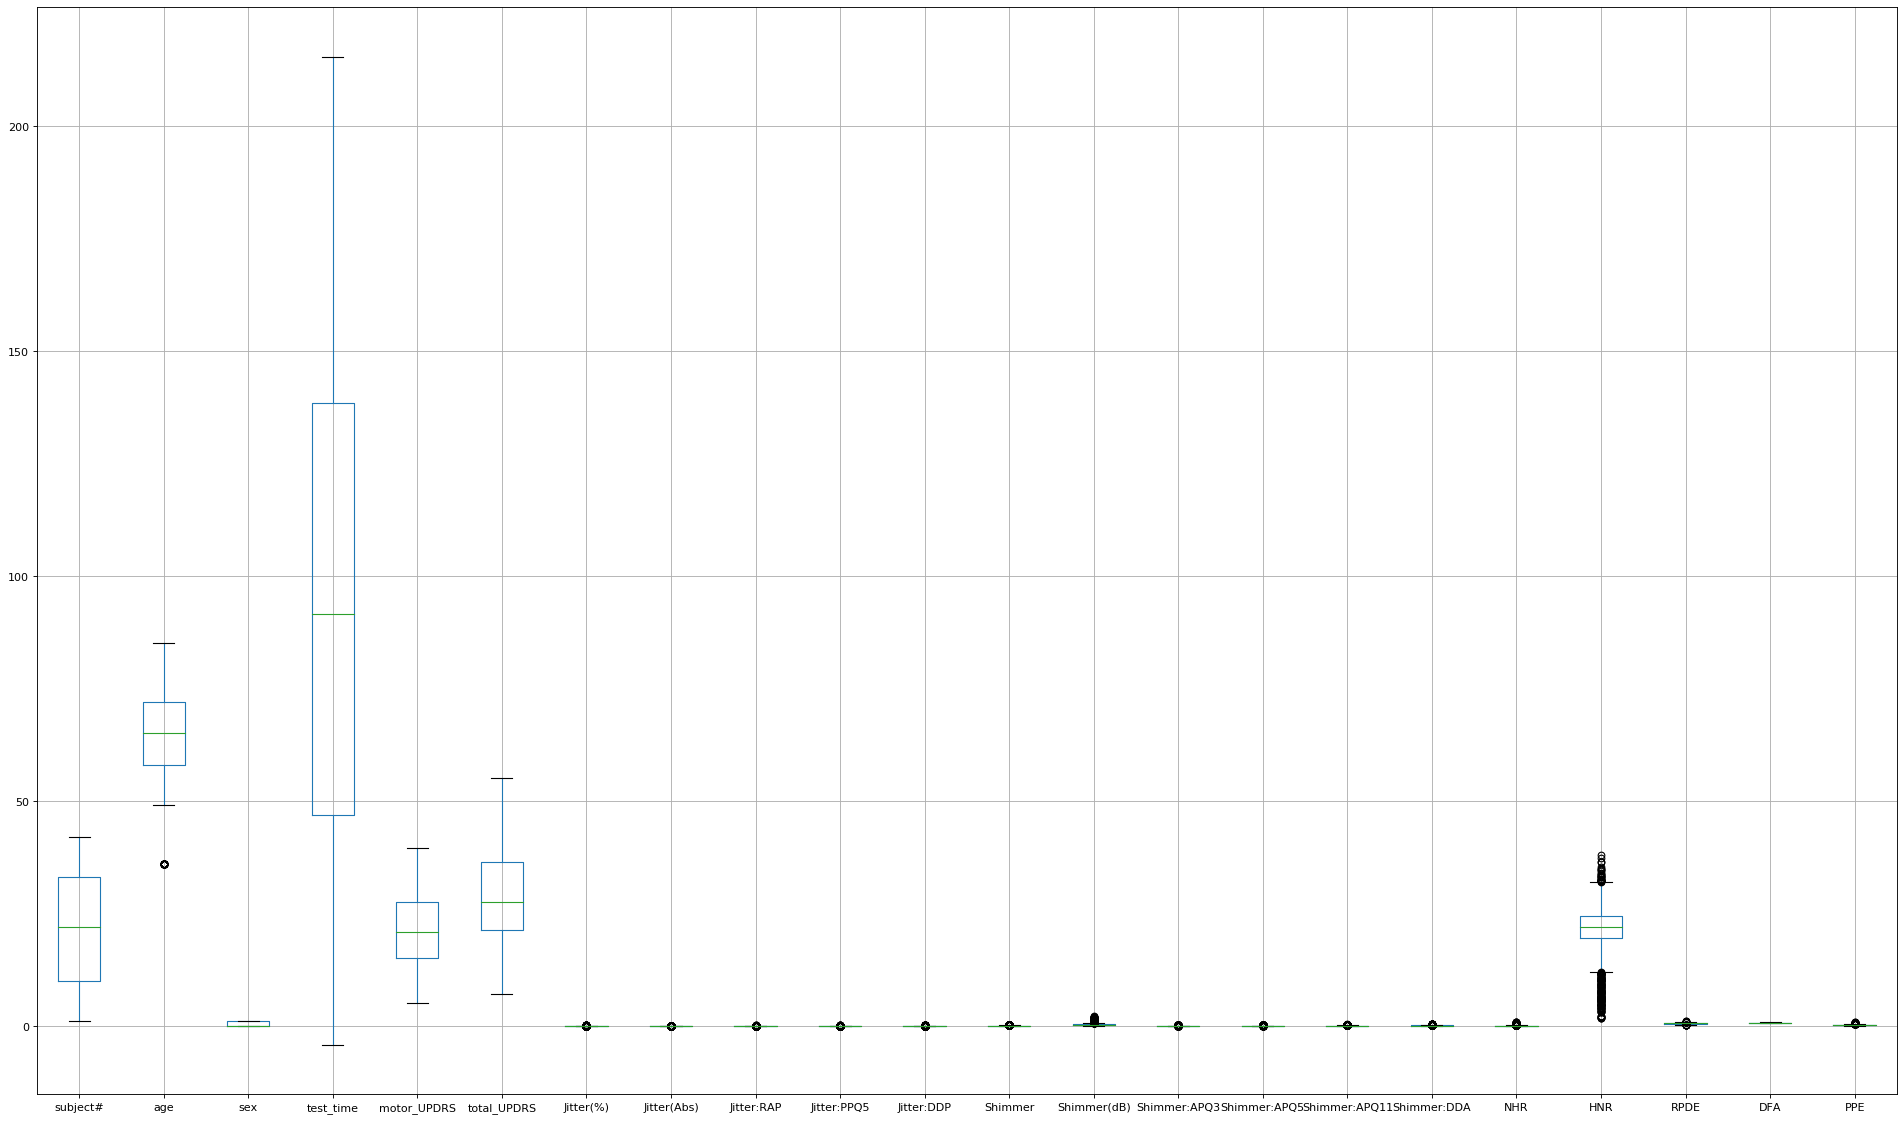

In [214]:
fig =plt.figure(num=None, figsize=(30, 18), dpi=80, facecolor='w', edgecolor='k')
dataset.boxplot()  

In [215]:
dataset.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [216]:
print("Looking at the univariate distribution we could see that the varables have different units so we need to normalize the numeric variables")

Looking at the univariate distribution we could see that the varables have different units so we need to normalize the numeric variables


##### Missing values analysis

In [217]:
print('We did not find any missing value in our dataset')
dataset.isnull().sum()

We did not find any missing value in our dataset


subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

### Data Processing

##### Splitting the features and target varaibles

In [218]:
# removed the 'subject' column as we want to generalise this model for everyone 
col_dict=[1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
X=dataset.iloc[:, col_dict]
col_names=X.columns
y_mupdrs=dataset.iloc[:,4]
print('new dataset shape',X.shape)
X.head()

new dataset shape (5875, 19)


,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


##### Splitting the data into training and testing set

In [219]:
#Splitting the data into Training Set and Test Set
X_train, X_test, y_train, y_test=train_test_split(X,y_mupdrs,test_size=0.3)
print('Training dataset shape: X_train:{}, y_train_m:{}'.format(X_train.shape,y_train.shape))
print('Testing dataset shape: X_test:{}, y_test_m:{}'.format(X_test.shape,y_test.shape))

Training dataset shape: X_train:(4112, 19), y_train_m:(4112,)
Testing dataset shape: X_test:(1763, 19), y_test_m:(1763,)


##### Normalization

In [220]:
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.003550,-0.686056,-1.124871,-0.675534,-0.798911,-0.596053,-0.538569,-0.594957,-0.735319,-0.782947,-0.672678,-0.663197,-0.782620,-0.672422,-0.488953,1.331998,-1.240583,-0.808017,-0.981008
1,0.116701,1.457608,1.150970,-0.777793,-0.973222,-0.646009,-0.609971,-0.646022,-0.771753,-0.826345,-0.677919,-0.732682,-0.887755,-0.677663,-0.487055,1.208279,-1.250099,-0.832534,-1.462782
2,-0.335904,1.457608,1.170394,8.455250,5.902382,7.310167,9.520480,7.311284,5.838400,5.852628,5.045269,5.969863,6.967627,5.045267,11.815254,-4.669538,2.400849,-0.640045,4.386775
3,0.003550,-0.686056,1.116604,-0.089870,-0.130719,-0.536107,-0.341501,-0.535011,-0.772141,-0.756908,-0.775988,-0.753225,-0.923142,-0.775732,-0.283042,1.192173,-0.373245,-1.241888,-1.402049
4,0.229852,-0.686056,-1.248400,0.133240,0.223991,0.263174,0.024075,0.264272,-0.500432,-0.205752,-0.489267,-0.533895,-0.719026,-0.489510,-0.279693,0.644074,-0.270156,1.986296,-0.335230


### Multiple Variate Linear Regression

In [221]:
#Model Creation
mlrObj = LinearRegression()
mlrObj.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
#Predicting on the Test Set
y_pred_mlr = mlrObj.predict(X_test)

In [223]:
score_mlr = mlrObj.score(X_test, y_test)
print('R2 Score: ',score_mlr)

R2 Score:  0.15030514894422253


In [224]:
MSE_mlr= mse(y_pred=y_pred_mlr,y_true=y_test)
print('Mean Squared Error is:',MSE_mlr)

Mean Squared Error is: 57.589470094535336


### Polynomial Regression

In [281]:
##Fitting on Ploynomial Regression
polyFeatureObj = PolynomialFeatures(degree=2)
X_poly = polyFeatureObj.fit_transform(X_train)
X_poly_test = polyFeatureObj.fit_transform(X_test)
prObj = LinearRegression()
prObj.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
score_poly = prObj.score(X_poly_test, y_test)
print('R2: ',score_poly)

#Predicting on the Test Set
y_pred_poly = prObj.predict(X_poly_test)

R2:  -0.9252669660448865


In [227]:
MSE_poly= mse(y_pred=y_pred_poly,y_true=y_test)
print('Mean Squared Error is:',MSE_poly)

Mean Squared Error is: 130.48814433472478


### Decision Tree Regressor

In [228]:
#Create and Fit a Regressor Object
dtObj = DecisionTreeRegressor()
dtObj.fit(X_train,y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [229]:
score_dt = dtObj.score(X_test, y_test)
print('R2: ',score_dt)
y_pred_dt = dtObj.predict(X_test)

R2:  0.9078385996384027


In [230]:
MSE_dt= mse(y_pred=y_pred_dt,y_true=y_test)

print('Mean Squared Error is:', MSE_dt)

Mean Squared Error is: 6.246390928931609


### Random Forest

In [231]:
#Create and Fit a Regressor Object
rdObj = RandomForestRegressor(n_estimators=100)
rdObj.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [232]:
score_rd = rdObj.score(X_test, y_test)
print('R2: ',score_rd)

#Predicting on the Test Set
y_pred_rd = rdObj.predict(X_test)

R2:  0.9677586599892364


In [233]:
MSE_rd= mse(y_pred=y_pred_rd,y_true=y_test)

print('Mean Squared Error is:',MSE_rd)

Mean Squared Error is: 2.185210001038047


##### Feature importance

In [234]:
# Get numerical feature importances
importances = list(rdObj.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(col_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.65
Variable: test_time            Importance: 0.08
Variable: DFA                  Importance: 0.08
Variable: sex                  Importance: 0.07
Variable: Jitter(Abs)          Importance: 0.03
Variable: Shimmer              Importance: 0.01
Variable: Shimmer(dB)          Importance: 0.01
Variable: Shimmer:APQ5         Importance: 0.01
Variable: Shimmer:APQ11        Importance: 0.01
Variable: NHR                  Importance: 0.01
Variable: HNR                  Importance: 0.01
Variable: RPDE                 Importance: 0.01
Variable: PPE                  Importance: 0.01
Variable: Jitter(%)            Importance: 0.0
Variable: Jitter:RAP           Importance: 0.0
Variable: Jitter:PPQ5          Importance: 0.0
Variable: Jitter:DDP           Importance: 0.0
Variable: Shimmer:APQ3         Importance: 0.0
Variable: Shimmer:DDA          Importance: 0.0


### Gradient Booster

In [235]:
#GradientBoosterRegressor
gbObj = GradientBoostingRegressor(n_estimators=100)
gbObj.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [236]:
score_gb = gbObj.score(X_test, y_test)
print('R2: ',score_gb)

#Predicting on the Test Set
y_pred_gb = gbObj.predict(X_test)
MSE_gb= mse(y_pred=y_pred_gb,y_true=y_test)

print('Mean Squared Error is:',MSE_gb)

R2:  0.7635898152904541
Mean Squared Error is: 16.0230902252228


### Feature Elimination 

In [237]:
X_train.shape

(4112, 19)

In [238]:

#Backward Elimination
import statsmodels.api as sm

X_dataset_cols = [1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
X_train_cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

X=dataset.iloc[:, X_dataset_cols]
cols = list(X.columns)

mydictionary = dict(zip(cols,X_train_cols))

pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_mupdrs,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
        print("Removed Col: {}. P Value: {}".format(feature_with_p_max,pmax))
        del mydictionary[feature_with_p_max]
    else:
        break
selected_features_BE = cols
selected_cols = list(mydictionary.values())

print("Selected features list {}".format(selected_features_BE))
print("Selected features index {}".format(selected_cols))


Removed Col: Shimmer:DDA. P Value: 0.9842471527106731
Removed Col: RPDE. P Value: 0.6524343968269333
Removed Col: Jitter:RAP. P Value: 0.29929562926366177
Removed Col: Jitter:DDP. P Value: 0.10605393558184897
Removed Col: Shimmer(dB). P Value: 0.05492480520254106
Selected features list ['age', 'sex', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:PPQ5', 'Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'NHR', 'HNR', 'DFA', 'PPE']
Selected features index [0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 14, 15, 17, 18]
C:\Users\hada6576\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [239]:
X_trainFE=X_train[:, selected_cols]
X_testFE=X_test[:, selected_cols]
print('X_train:{}, X_test:{}'.format(X_trainFE.shape,X_testFE.shape))

X_train:(4112, 14), X_test:(1763, 14)


In [240]:
#Create and Fit a Regressor Object
rdObjFE = RandomForestRegressor(n_estimators=100)
rdObjFE.fit(X_trainFE,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [241]:
score_rdFE = rdObjFE.score(X_testFE, y_test)
print('R2: ',score_rdFE)
#Predicting on the Test Set
y_pred_rdFE = rdObjFE.predict(X_testFE)

R2:  0.9696630285808366


In [242]:
MSE_rdFE= mse(y_pred=y_pred_rdFE,y_true=y_test)
print('Mean Squared Error is:',MSE_rdFE)

Mean Squared Error is: 2.0561382785029925


In [243]:
#GradientBoosterRegressor
gbObjFE = GradientBoostingRegressor(n_estimators=100)
gbObjFE.fit(X_trainFE,y_train)
score_gbFE = gbObjFE.score(X_testFE, y_test)
print('R2: ',score_gbFE)

#Predicting on the Test Set
y_pred_gbFE = gbObjFE.predict(X_testFE)
MSE_gbFE= mse(y_pred=y_pred_gbFE,y_true=y_test)

print('Mean Squared Error is:',MSE_gbFE)

R2:  0.7727897418826217
Mean Squared Error is: 15.399550025240142


### Feature Extraction

##### PCA on all features

In [277]:
#PCA All
from sklearn.decomposition import PCA
pcaObjAll = PCA(n_components=8)
X_train_PCA_All = pcaObjAll.fit_transform(X_train)
X_test_PCA_All = pcaObjAll.transform(X_test)

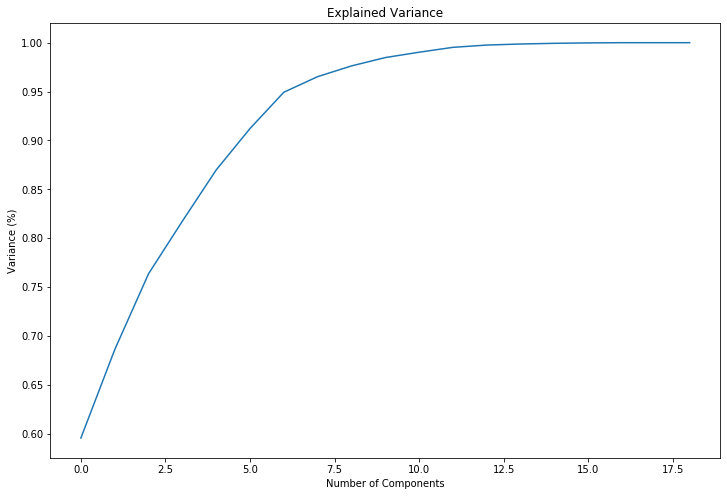

In [278]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pcaObjAll.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [246]:
#Create and Fit the PCA components to a  Random Forest Regressor Object 
regObjPCA_All = RandomForestRegressor(n_estimators=100)
regObjPCA_All.fit(X_train_PCA_All,y_train) 

scorePCA_All = regObjPCA_All.score(X_test_PCA_All, y_test)
print('Random Forest Regressor R2: ',scorePCA_All)

#Predicting on the Test Set
y_pred_PCA_All = regObjPCA_All.predict(X_test_PCA_All)

MSE_rdPCA_All= mse(y_pred=y_pred_PCA_All,y_true=y_test)

print('Mean Squared Error is:',MSE_rdPCA_All)

Random Forest Regressor R2:  0.6267002812805303
Mean Squared Error is: 25.30100419083524


In [247]:
#Fit PCA on GradientBoosterRegressor
gbObjPCA_ALL = GradientBoostingRegressor(n_estimators=100)
gbObjPCA_ALL.fit(X_train_PCA_All,y_train)
score_gbPCA_ALL = gbObjPCA_ALL.score(X_test_PCA_All, y_test)
print('R2: ',score_gbPCA_ALL)

#Predicting on the Test Set
y_pred_gbPCA_ALL = gbObjPCA_ALL.predict(X_test_PCA_All)
MSE_gbPCA_ALL= mse(y_pred=y_pred_gbPCA_ALL,y_true=y_test)

print('Mean Squared Error is:',MSE_gbPCA_ALL)

R2:  0.39454162785759483
Mean Squared Error is: 41.03593987024433


##### PCA on selected features

In [279]:
#PCA FE
from sklearn.decomposition import PCA
pcaObjFE = PCA(n_components=14)
X_train_PCA_FE = pcaObjFE.fit_transform(X_trainFE)
X_test_PCA_FE = pcaObjFE.transform(X_testFE)

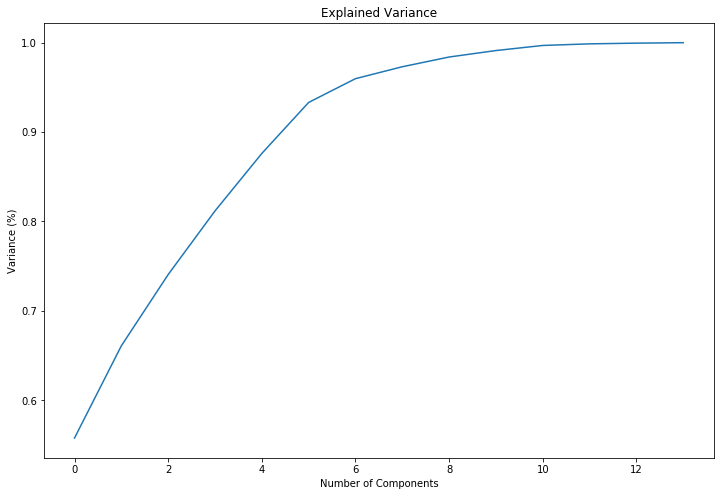

In [280]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pcaObjFE.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [250]:
#Create and Fit the PCA components to a  Random Forest Regressor Object 
regObjFEPCA = RandomForestRegressor(n_estimators=100)
regObjFEPCA.fit(X_train_PCA_FE,y_train) 

scorePCA = regObjFEPCA.score(X_test_PCA_FE, y_test)
print('Random Forest Regressor R2: ',scorePCA)

#Predicting on the Test Set
y_pred_FEPCA = regObjFEPCA.predict(X_test_PCA_FE)

MSE_rdFEPCA= mse(y_pred=y_pred_FEPCA,y_true=y_test)

print('Mean Squared Error is:',MSE_rdFEPCA)

Random Forest Regressor R2:  0.6635623364349124
Mean Squared Error is: 22.80261759910921


In [251]:
#Fit PCA on GradientBoosterRegressor after Feature Elimination
gbObjFEPCA = GradientBoostingRegressor(n_estimators=100)
gbObjFEPCA.fit(X_train_PCA_FE,y_train)
score_gbFEPCA = gbObjFEPCA.score(X_test_PCA_FE, y_test)
print('R2: ',score_gbFEPCA)

#Predicting on the Test Set
y_pred_gbFEPCA = gbObjFEPCA.predict(X_test_PCA_FE)
MSE_gbFEPCA= mse(y_pred=y_pred_gbFEPCA,y_true=y_test)

print('Mean Squared Error is:',MSE_gbFEPCA)

R2:  0.45385204909787613
Mean Squared Error is: 37.01607823866283


##### KPCA on all features

In [252]:
#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj_All = KernelPCA(n_components=8)
X_train_KPCA_All = kernelPCAObj_All.fit_transform(X_train)
X_test_KPCA_All = kernelPCAObj_All.transform(X_test)

In [253]:
#Create and Fit the KPCA components to a Random Forest Regressor Object on ALL features
regObj_KPCA_All = RandomForestRegressor(n_estimators=100)
regObj_KPCA_All.fit(X_train_KPCA_All,y_train) 
score = regObj_KPCA_All.score(X_test_KPCA_All, y_test)
print('Random Forest Regressor R2: ',score)

Random Forest Regressor R2:  0.6195093726026993


In [254]:
#Predicting on the Test Set
y_pred_KPCA_ALL = regObj_KPCA_All.predict(X_test_KPCA_All)
MSE_KPCA_All= mse(y_pred=y_pred_KPCA_ALL,y_true=y_test)
print('Mean Squared Error is:',MSE_KPCA_All)

Mean Squared Error is: 25.788379887816248


In [255]:
#Fit KPCA on GradientBoosterRegressor All features
gbObj_KPCA_ALL = GradientBoostingRegressor(n_estimators=100)
gbObj_KPCA_ALL.fit(X_train_KPCA_All, y_train)
score_gb_KPCA_ALL = gbObj_KPCA_ALL.score(X_test_KPCA_All, y_test)
print('R2: ', score_gb_KPCA_ALL)

#Predicting on the Test Set
y_pred_gb_KPCA_ALL = gbObj_KPCA_ALL.predict(X_test_KPCA_All)
MSE_gb_KPCA_ALL= mse(y_pred=y_pred_gb_KPCA_ALL,y_true=y_test)

print('Mean Squared Error is:', MSE_gb_KPCA_ALL)

R2:  0.3947235824292723
Mean Squared Error is: 41.0236075990164


##### KPCA on selected features

In [256]:
#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj_FE = KernelPCA(n_components=8)
X_train_KPCA_FE = kernelPCAObj_FE.fit_transform(X_trainFE)
X_test_KPCA_FE = kernelPCAObj_FE.transform(X_testFE)

In [257]:
#Create and Fit the KPCA components to a Random Forest Regressor Object after Feature Elimination
regObj_KPCA_FE = RandomForestRegressor(n_estimators=100)
regObj_KPCA_FE.fit(X_train_KPCA_FE,y_train) 

score = regObj_KPCA_FE.score(X_test_KPCA_FE, y_test)
print('Random Forest Regressor R2: ',score)

Random Forest Regressor R2:  0.6706570542941588


In [258]:
#Predicting on the Test Set
y_pred_KPCA_FE = regObj_KPCA_FE.predict(X_test_KPCA_FE)
MSE_KPCA_FE= mse(y_pred=y_pred_KPCA_FE,y_true=y_test)
print('Mean Squared Error is:',MSE_KPCA_FE)

Mean Squared Error is: 22.321761393523698


In [259]:
#Fit KPCA on GradientBoosterRegressor after Feature Elimination
gbObj_KPCA_FE = GradientBoostingRegressor(n_estimators=100)
gbObj_KPCA_FE.fit(X_train_KPCA_FE, y_train)
score_gb_KPCA_FE = gbObj_KPCA_FE.score(X_test_KPCA_FE, y_test)
print('R2: ',score_gb_KPCA_FE)

#Predicting on the Test Set
y_pred_gb_KPCA_FE = gbObj_KPCA_FE.predict(X_test_KPCA_FE)
MSE_gb_KPCA_FE= mse(y_pred=y_pred_gb_KPCA_FE, y_true=y_test)

print('Mean Squared Error is:', MSE_gb_KPCA_FE)

R2:  0.4538265481263135
Mean Squared Error is: 37.017806609074114


### Hyper Parameter Tuning

##### Gradient Boosting Regressor

In [260]:
'''
#Hyper parameter tuning for Gradient Boosting Regressor
estimatorGB = GradientBoostingRegressor()
parametersGB = {'learning_rate': [0.001,0.01,0.02,0.03,0.1],
                 'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,200,300,400],
                  'max_depth'    : [4,6,8] 
              }

cv =5
gridGB = GridSearchCV(estimator=estimatorGB , param_grid = parametersGB, cv = cv, n_jobs=-1)
gridGB.fit(X_trainFE, y_train) 
    
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
print("\n The best estimator across ALL searched params:\n", gridGB.best_estimator_)
print("\n The best score across ALL searched params:\n",gridGB.best_score_)
print("\n The best parameters across ALL searched params:\n",gridGB.best_params_)
print("\n ========================================================")
'''

'\n#Hyper parameter tuning for Gradient Boosting Regressor\nestimatorGB = GradientBoostingRegressor()\nparametersGB = {\'learning_rate\': [0.001,0.01,0.02,0.03,0.1],\n                 \'subsample\'    : [0.9, 0.5, 0.2],\n                  \'n_estimators\' : [100,200,300,400],\n                  \'max_depth\'    : [4,6,8] \n              }\n\ncv =5\ngridGB = GridSearchCV(estimator=estimatorGB , param_grid = parametersGB, cv = cv, n_jobs=-1)\ngridGB.fit(X_trainFE, y_train) \n    \nprint("\n========================================================")\nprint(" Results from Grid Search " )\nprint("========================================================")    \nprint("\n The best estimator across ALL searched params:\n", gridGB.best_estimator_)\nprint("\n The best score across ALL searched params:\n",gridGB.best_score_)\nprint("\n The best parameters across ALL searched params:\n",gridGB.best_params_)\nprint("\n ========================================================")\n'


### Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9690851808278743

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.9}

In [261]:
#GradientBoosterRegressor
gridGB = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.03, loss='ls', max_depth=8, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=400, n_iter_no_change=None, presort='auto', random_state=None, subsample=0.9, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)
gridGB.fit(X_trainFE,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [262]:
#Predicting on the Test Set
y_pred_gridgb = gridGB.predict(X_testFE)
MSE_gridgb= mse(y_pred=y_pred_gridgb,y_true=y_test)
print('Mean Squared Error is:',MSE_gridgb)

Mean Squared Error is: 1.8202295208172605


In [263]:
'''#Hyper parameter tuning for Random Forest Regressor
estimator = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 50)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
parameters = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


cv =5

grid = GridSearchCV(estimator=estimator , param_grid = parameters, cv = cv, n_jobs=-1)

grid.fit(X_trainFE, y_train) 
    
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n ========================================================")
'''

'#Hyper parameter tuning for Random Forest Regressor\nestimator = RandomForestRegressor()\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 50)]\n\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n\n# Create the random grid\nparameters = {\'n_estimators\': n_estimators,\n               \'min_samples_split\': min_samples_split,\n               \'min_samples_leaf\': min_samples_leaf,\n               \'bootstrap\': bootstrap}\n\n\ncv =5\n\ngrid = GridSearchCV(estimator=estimator , param_grid = parameters, cv = cv, n_jobs=-1)\n\ngrid.fit(X_trainFE, y_train) \n    \nprint("\n========================================================")\nprint(" Results from Grid Search " )\nprint("===============================================

 #### Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=137,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9595087816919157

 The best parameters across ALL searched params:
 {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 137}

In [264]:
#Create and Fit a Regressor Object
rdObj_Best = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=137, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)
rdObj_Best.fit(X_trainFE,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=137,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [265]:
#Predicting on the Test Set
y_pred_gridRF = rdObj_Best.predict(X_testFE)
MSE_gridRF= mse(y_pred=y_pred_gridRF,y_true=y_test)
print('Mean Squared Error is:',MSE_gridRF)

Mean Squared Error is: 2.193412980164303


### Ensemble Method

In [266]:
from sklearn.ensemble import VotingRegressor

import statistics
model1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.03, loss='ls', max_depth=8, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=400, n_iter_no_change=None, presort='auto', random_state=None, subsample=0.9, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)
model2 =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=137, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

model = VotingRegressor(estimators=[('GB', model1), ('RF', model2)])
model.fit(X_trainFE,y_train)

VotingRegressor(estimators=[('GB',
                             GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.03,
                                                       loss='ls', max_depth=8,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                  

In [267]:
y_pred_En = model.predict(X_testFE)
MSE_En= mse(y_pred=y_pred_En,y_true=y_test)
print('Mean Squared Error is:',MSE_En)

Mean Squared Error is: 1.9266968037041203


### K-fold cross validation

##### Random forest regressor

In [268]:
#K-Fold Cross Validation for RandomForestRgressor Model
XAll =np.concatenate((X_trainFE,X_testFE))
yAll =np.concatenate((y_train,y_test))
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=rdObj_Best, X= XAll, y= yAll, cv= 10)
print('R2 is:',modelAccuracies.mean())

R2 is: 0.9758352565579875


In [269]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(rdObj_Best, XAll, yAll, cv=10) 


In [270]:
MSE_Kfold= mse(y_pred=predicted,y_true=yAll)
print('Mean Squared Error is:',MSE_Kfold)

Mean Squared Error is: 1.6194927496364484


##### Gradient boosting regressor

In [271]:
#K-Fold Cross Validation for Gradient Booster Regression Model
XAll =np.concatenate((X_trainFE,X_testFE))
yAll =np.concatenate((y_train,y_test))
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=gridGB, X= XAll, y= yAll, cv= 10)
print('R2 is:',modelAccuracies.mean())

R2 is: 0.9799976781984405


In [272]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(rdObj_Best, XAll, yAll, cv=10) 

In [273]:
MSE_Kfold= mse(y_pred=predicted,y_true=yAll)
print('Mean Squared Error is:',MSE_Kfold)

Mean Squared Error is: 1.622325769836548


##### Ensemble of random forest and gradient boosting

In [274]:
#K-Fold Cross Validation for Ensemble Model
XAll =np.concatenate((X_trainFE,X_testFE))
yAll =np.concatenate((y_train,y_test))
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=model, X= XAll, y= yAll, cv= 10)
print('R2 is:',modelAccuracies.mean())

R2 is: 0.9806046918245448


In [275]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model, XAll, yAll, cv=10) 

In [276]:
MSE_Kfold= mse(y_pred=predicted,y_true=yAll)
print('Mean Squared Error is:',MSE_Kfold)

Mean Squared Error is: 1.2787935523492653
